# Classical Statistical Inference: Confidence intervals

## Table of Content

- II. What is statistical inference ?
    * II.1 Point estimate: See [Frequentist_inference_01.ipynb](Frequentist_inference_01.ipynb)
    * II.2 [Confidence interval](#II.2-Confidence-interval:)
        - [II.2.1 Normal distribution with a known variance](#II.2.1-Normal-distribution-with-a-known-variance)
        - [II.2.2. Interpretation of CI](#II.2.2-Interpretation-of-CI)
        - [II.2.3 Normal distribution with an unknown variance](#II.2.3-Normal-distribution-with-unknown-variance)
        - [II.2.4 Confidence interval for variances](#II.2.4-Confidence-interval-for-variances)
        - [II.2.5 Confidence interval between 2 means](#CImean-diff)
        - [II.2.6 Confidence interval for proportions](#II.2.6-Confidence-intervals-for-proportions)
    * II.3 Hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb) 

    * II.4 Bootstrap and Jacknife: See [Frequentist_inference_Bootstrap.ipynb](Frequentist_inference_Bootstrap.ipynb) 
    
    * II.5 Wrap up: Various approaches of hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb)
    
- X. [References and supplementary material](#X)

In [1]:
# Some initialisation for interactive cells
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## II. What is statistical inference ?  <a class="anchor" id="II"></a>


See [Frequentist_inference_01.ipynb](Frequentist_inference_01.ipynb)

### II.2 Confidence interval: 

We have seen that to each estimator $\hat{\theta}$ is associated a pdf. Building a confidence interval consists in defining a region (a, b) that contains $\hat{\theta}$, and that is such that:

$$
p(\theta \in [a,b]) \leq 1-\alpha. 
$$. 

If $\alpha = 0.05$, one speaks of a $(1-\alpha)*100 \% = 95\%$ confidence interval. 

Note that $a, b$ are functions of the observed sample.  

=> The strategy to draw a confidence interval around $\hat{\theta}$ is to look at the distribution of $\hat{\theta}$ (which could be known theoretically or unknown) and define regions around $\hat{\theta}$ that contain/enclose (1-$\alpha) \times 100$% of the *probability distribution*. Those intervals can be one-sided ($p(\theta \in ]-\infty, \theta_{up}])$ or $p(\theta \in [\theta_{low}, +\infty[)$) or two-sided.

Text(0.5,1,u'CDF ($\\hat{\\theta}$)')

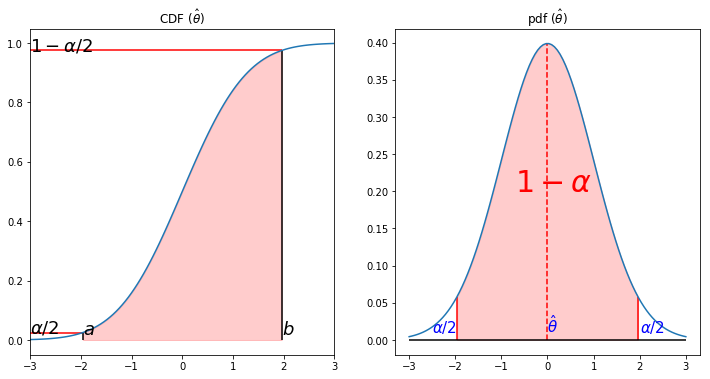

In [2]:
# Visual interpretation of the CI around the mean for a normal distribution
alpha = 0.05
norm = scipy.stats.norm()
x = np.linspace(-3.,3.,100)
f, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[1].plot(x, norm.pdf(x))
ax[0].plot(x, norm.cdf(x))

a, b = norm.ppf(alpha/2.), norm.ppf(1-alpha/2.)
ax[0].hlines(alpha/2., -3, a, color='red')
ax[0].hlines(1.-alpha/2., -3, b, color='red')
ax[0].vlines(a, 0., norm.cdf(a))
ax[0].vlines(b, 0., norm.cdf(b))
ax[0].fill_between(np.linspace(a, b, 100), 0, norm.cdf(np.linspace(a, b, 100)), color='red', alpha=0.2)
ax[0].annotate(r'$\alpha/2$', (-3, alpha/2.), fontsize=18.)
ax[0].annotate(r'$1-\alpha/2$', (-3, 1.-alpha/2.), fontsize=18.)
ax[0].annotate(r'$a$', (a, 0.02), fontsize=18.)
ax[0].annotate(r'$b$', (b, 0.02), fontsize=18.)

cv1 = ax[1].vlines(a, 0, norm.pdf(a), color='red')
cv2 = ax[1].vlines(b, 0, norm.pdf(b), color='red')
cm = ax[1].vlines(0, 0, norm.pdf(0), linestyle = '--', color='red')
c0 = ax[1].hlines(0, -3, 3, color='black')
ax[0].set_xlim(-3,3)
ax[1].fill_between(np.linspace(a, b, 100), 0, norm.pdf(np.linspace(a, b, 100)), color='red', alpha=0.2)
ax[1].text(-0.7, 0.2,r'$1-\alpha$', color='red', fontsize=30)
ax[1].text(-2.5, 0.01,r'$\alpha/2$', color='blue', fontsize=15)
ax[1].text(2., 0.01,r'$\alpha/2$', color='blue', fontsize=15)
ax[1].text(0., 0.01, r'$\hat{\theta}$', color='blue', fontsize=15)
ax[1].set_title(r'pdf ($\hat{\theta}$)')
ax[0].set_title(r'CDF ($\hat{\theta}$)')

Hopefully, you then end up with: 

$$
\hat{\theta} \pm (multiplier) \times \, stde(\hat{\theta}),
$$

where $\hat{\theta}$ is your *point-estimate* of $\theta$, and $stde(\hat{\theta})$ is the *standard error* on your estimator. The *multiplier* factor depends simply of the pdf of your estimator. For a gaussian, as we have seen last time, it will be 1.96 for a 95% confidence interval. 

For a one sided confidence interval:

$$
p(\theta < b) \leq 1-\alpha. 
$$. 

Text(0.5,1,u'CDF ($\\hat{\\theta}$)')

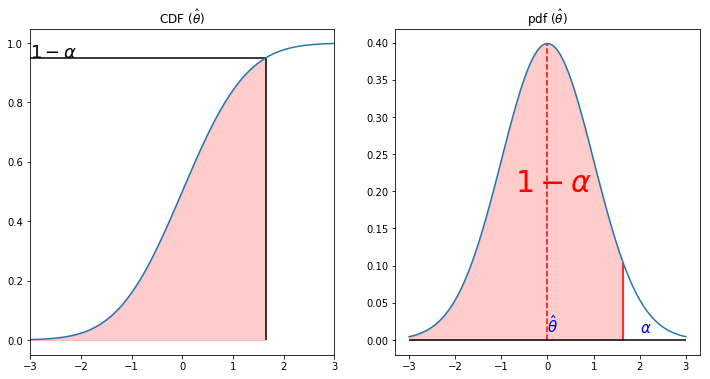

In [3]:
# The same for p(theta < b) < 1-alpha
alpha = 0.05
norm = scipy.stats.norm()
x = np.linspace(-3.,3.,100)
f, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[1].plot(x, norm.pdf(x))
ax[0].plot(x, norm.cdf(x))

b =  norm.ppf(1-alpha)
ax[0].hlines(1.-alpha, -3, b, color='black')
ax[0].vlines(b, 0., norm.cdf(b))
ax[0].fill_between(np.linspace(-3, b, 100), 0, norm.cdf(np.linspace(-3,  b, 100)), color='red', alpha=0.2)
ax[0].annotate(r'$1-\alpha$', (-3, 1.-alpha), fontsize=18.)

cv2 = ax[1].vlines(b, 0, norm.pdf(b), color='red')
cm = ax[1].vlines(0, 0, norm.pdf(0), linestyle = '--', color='red')
c0 = ax[1].hlines(0, -3, 3, color='black')
ax[0].set_xlim(-3,3)
ax[1].fill_between(np.linspace(-3, b, 100), 0, norm.pdf(np.linspace(-3, b, 100)), color='red', alpha=0.2)
ax[1].text(-0.7, 0.2,r'$1-\alpha$', color='red', fontsize=30)
#ax[1].text(-2.5, 0.01,r'$\alpha/2$', color='blue', fontsize=15)
ax[1].text(2., 0.01,r'$\alpha$', color='blue', fontsize=15)
ax[1].text(0., 0.01, r'$\hat{\theta}$', color='blue', fontsize=15)
ax[1].set_title(r'pdf ($\hat{\theta}$)')
ax[0].set_title(r'CDF ($\hat{\theta}$)')

#### II.2.1 Normal distribution with a known variance (z-confidence interval)

If $\{x_i\}$ is our sample of $N$ points drawn from a normal distribution of mean $\mu$ and width $\sigma$, then the estimator $\bar{x}$ follows a normal distribution $N(\mu, \sigma/\sqrt{N}$) (remember that your standard error on the mean, $stde = \sigma/\sqrt{N})$. This is equivalent to say that the distribution of the random variable $Z = (\bar{x}-\mu)/stde$ follows a normal distribution $N(0,1)$.     

If we define $z_{\alpha/2} = CDF^{-1}(1-\alpha/2)$, such that $p(Z \leq z_{\alpha/2} ) = 1-\alpha/2$, then the confidence interval is simply: 

$$
CI_{\alpha} = [\bar{x}-z_{\alpha/2} \, stde , {\bar{x}}+z_{\alpha/2} \, stde] = [\bar{x}-z_{\alpha/2} \, \frac{\sigma}{\sqrt{N}} , {\bar{x}}+z_{\alpha/2} \, \frac{\sigma}{\sqrt{N}}] 
$$

You can also write the CI as:
$$
 {\bar{x}} \pm z_{\alpha/2} \, \frac{\sigma}{\sqrt{N}}
$$

A 95% confidence interval would then be $[\bar{x}-1.96\,stde, \bar{x}-1.96\,stde]$, i.e. $z_{\alpha/2} = 1.96$. 

Text(0,0.01,u'$\\hat{\\theta}$')

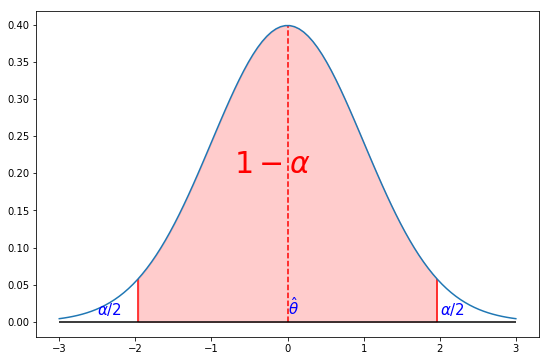

In [4]:
# Visual interpretation of the CI around the mean for a normal distribution

norm = scipy.stats.norm()
x = np.linspace(-3.,3.,100)
plt.figure(figsize=(9, 6))
plt.plot(x, norm.pdf(x))
a1, a2 = norm.ppf(0.025), norm.ppf(1-0.025)
cv1 = plt.vlines(a1, 0, norm.pdf(a1), color='red')
cv2 = plt.vlines(a2, 0, norm.pdf(a2), color='red')
cm = plt.vlines(0, 0, norm.pdf(0), linestyle = '--', color='red')
c0 = plt.hlines(0, -3, 3, color='black')
plt.fill_between(np.linspace(a1, a2, 100), 0, norm.pdf(np.linspace(a1, a2, 100)), color='red', alpha=0.2)
plt.text(-0.7, 0.2,r'$1-\alpha$', color='red', fontsize=30)
plt.text(-2.5, 0.01,r'$\alpha/2$', color='blue', fontsize=15)
plt.text(2., 0.01,r'$\alpha/2$', color='blue', fontsize=15)
plt.text(0., 0.01, r'$\hat{\theta}$', color='blue', fontsize=15)

#### How to estimate $z_{\alpha/2}$ in `python` ? 

When the distribution of the variable is known, it is easy to get the confidence interval from the CDF using `scipy.stats.distribution.ppf(a)`. This function gives, for a probability $p(x < a)$ the corresponding value of x. 

In [10]:
alpha = 0.01
# Imagine that we have 10 data points drawn from a gaussian of mean 20, and width 3
mu, sigma = 20, 3.
Npts = 10
norm = scipy.stats.norm(mu, sigma)
x_sample = norm.rvs(Npts)   # We generate our fake sample, i.e. draw 10 points from the Gaussian
print 'My sample is ', x_sample
x_mean = np.mean(x_sample)   # we calculate the mean of our random variable
# The mean has a distribution N(x_mean, sigma/sqrt(N))
norm_mean = scipy.stats.norm(0,1)
stde = sigma/np.sqrt(Npts)
za1, za2 = norm_mean.ppf(alpha/2.), norm_mean.ppf(1-alpha/2.)
print 'z_alpha/2, z_(1-alpha/2) = %.2f, %.2f' %(za1, za2)
a1, a2 = x_mean+za1*stde, x_mean+za2*stde
print "My %.2f percents confidence interval around %.2f is [%.2f,%.2f] - using stde" % ((1-alpha)*100., x_mean, a1, a2)

# Alternatively, we can also do:
norm_mean = scipy.stats.norm(x_mean, sigma/np.sqrt(Npts))
a1, a2 = norm_mean.ppf(alpha/2.), norm_mean.ppf(1-alpha/2.)
print "My %.2f percents confidence interval around %.2f is [%.2f,%.2f] - using N(mu, sig/sqrt(N))" %((1-alpha)*100., x_mean, a1, a2)

# A second alternative using "interval" method (that takes 1-alpha as argument !)
a1, a2 = scipy.stats.norm.interval((1-alpha), loc=x_mean, scale=sigma/np.sqrt(Npts))
print "My %.2f percents confidence interval around %.2f is [%.2f,%.2f] - using scipy.interval" %((1-alpha)*100., x_mean, a1, a2)

My sample is  [ 17.37519364  17.24551239  17.24213501  11.2144729   22.23756641
  19.32569899  27.48786975  17.68278577  20.38597198  22.98953961]
z_alpha/2, z_(1-alpha/2) = -2.58, 2.58
My 99.00 percents confidence interval around 19.32 is [16.88,21.76] - using stde
My 99.00 percents confidence interval around 19.32 is [16.88,21.76] - using N(mu, sig/sqrt(N))
My 99.00 percents confidence interval around 19.32 is [16.88,21.76] - using scipy.interval


#### II.2.2 Interpretation of CI

An important point to keep in mind, in interpreting confidence intervals in *a frequentist way*, is that a confidence interval **is not a probability statement about $\theta$** since $\theta $ is a fixed quantity (i.e. $\theta$ is NOT a random variable). A 95% confidence interval means that if you repeat your observation over and over, then, 95% of the time $\theta$ will fall in your confidence interval. [Wasserman](#WAS04) suggests an alternative interpretation. Imagine that you measure one day one parameter $\theta_1$ and derive a 95% confidence interval $C_1$. The next day, you do it for another parameter $\theta_2$ (possibly associated to a different experiment), and get $C_2$. And so on. Imagine you did it for 100 parameters. Then, 95 times you will have trapped the true parameter value, and 5 times you won't. In other words, your confidence interval $C_n$ is a random variable.  

#### Example: 

The following example, taken from [Wasserman](#WAS04) and originally given by Berger and Wolpert (1984), is interesting to understand CI in the context of a frequentist paradigm. Let $\theta$ be a fixed known real number, and $X_1$, $X_2$ be two independent random variables such that $p(X_i = 1) = p(X_i = -1) = 1/2$. Now let's define another random variable, $Y_i = \theta+X_i$, and suppose that you observe only $Y_1$ and $Y_2$. We can then define the following confidence interval (that contains effectively one point):   


$$
C~=~{Y_1 - 1} ~{\rm {if~}} Y_1 = Y_2   \\
C~=~{(Y_1 + Y_2)/2} ~{\rm {if~}} Y_1 \neq Y_2
$$


You can check, no matter what $\theta$ is, you have $p(\theta) \in C = 3/4$, which means that we have a 75% confidence interval. 
Let's imagine that we do an experiment and draw $Y_1 = 18$ and $Y_2=16$. Then our 75% confidence interval is {17}. However, you are certain that $\theta$ = 17. This does not mean that CI in the context of classical inference is nonsense, it simply underlines that you cannot make a probability statement about $\theta$ based on your CI. The only valid probability statement about $\theta$ you can make is $p(\theta ~\in ~C| Y_1, Y_2 ) = 1$.  

If you want to interpret a confidence interval as a statement about the probability that $\theta$ is in a given range, then you'll have to wait for our lecture on Bayesian inference. 

#### II.2.3 Normal distribution with *unknown variance*

In the case where the variance of our population is unknown, then, we use our estimator $\hat{\sigma} = \sqrt{1/(n-1) \, \sum_i (x_i-{\bar{x}})^2}$ instead of $\sigma$ to calculate the stde. 

The distribution of $(\bar{x}-\mu)/\hat{\sigma}$ is **not** a normal distribution, but almost. It is a Student's distribution (note that the inventor of the Student's distribution is not Mr Student but Mr R. Gosset who used the pseudonym of Student's for his publication).  

In that case our condifidence interval can be re-written: 

$$
CI_{\alpha} = [\bar{x}-t_{\alpha/2} \, stde , {\bar{x}}+t_{\alpha/2} \, stde] = [\bar{x}-t_{\alpha/2} \, \frac{\sigma}{\sqrt{N}} , {\bar{x}}+t_{\alpha/2} \, \frac{\sigma}{\sqrt{N}}] , 
$$

where $t_{\alpha/2} = CDF^{-1}(1-\alpha/2)$, and the CDF is the one of the Student's distribution. 

**Exercise:**

Let's consider the following sample of 10 points drawn from a normal distribution $N(\mu=20, \sigma=3)$

``` python
mu, sigma = 20, 3.
Npts = 10
norm = scipy.stats.norm(mu, sigma)
x_sample = norm.rvs(Npts)  
```
- Compare the distribution of $(x-\hat{\mu})/\sigma$ when you assume that you know $\sigma$ and when you estimate $\sigma$ directly from the data. (Use directly `scipy.stats.distribution.pdf()`, note that the student's distribution is `scipy.stats.t(dof)`)
- Calculate a 99% confidence interval around the mean (for a stdev estimated from the data) and compare to the results we obtained above.  

#### II.2.4 Confidence interval for variances

We have seen that if random variables $\{x_i\}$ are normally distributed with mean $\mu$ and variance $\sigma$, then $(n-1)\, \hat{\sigma}^2 / \sigma^2$  is distributed as a $\chi^2(n-1)$ distribution (where $\hat{\sigma}^2$ is the variance estimated from the sample). 

Once we know the distribution of our random variable, it becomes easy to calculate the confidence interval.   
This time, we need to calculate $c_{1-\alpha/2} = \chi^2_{1-\alpha/2}(n-1)$, $c_{\alpha/2} = \chi^2_{\alpha/2}(n-1)$.   

c_{1-alpha/2} = 16.92, c_{alpha/2} = 3.33


Text(0.5,0,u'$x$')

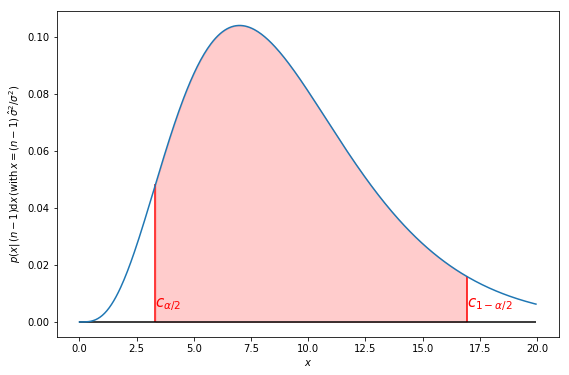

In [9]:
n = 10
alpha=0.1
x = np.arange(0,20, 0.05)
chi2dist = scipy.stats.chi2(n-1)
plt.figure(figsize=(9,6))
plt.plot(x, chi2dist.pdf(x))
ca1, ca2 = chi2dist.ppf(1-alpha/2), chi2dist.ppf(alpha/2)
cv1 = plt.vlines(ca1, 0, chi2dist.pdf(ca1), color='red')
cv2 = plt.vlines(ca2, 0, chi2dist.pdf(ca2), color='red')
cm = plt.vlines(0, 0, chi2dist.pdf(0), linestyle = '--', color='red')
plt.fill_between(np.linspace(ca1, ca2, 100), 0, chi2dist.pdf(np.linspace(ca1, ca2, 100)), color='red', alpha=0.2)
print 'c_{1-alpha/2} = %.2f, c_{alpha/2} = %.2f' % (ca1, ca2)
plt.hlines(0, x.min(), x.max(), color='black')
plt.annotate(r'$c_{\alpha/2}$', (ca2, 0.005) , fontsize=15, color='red')
plt.annotate(r'$c_{1-\alpha/2}$', (ca1, 0.005) , fontsize=15, color='red') 
plt.ylabel(r'$p( x | \, (n-1 ) {\rm{d}}x \, ({\rm {with}} \, x= (n-1)\, \hat{\sigma}^2 / \sigma^2) $')
plt.xlabel(r'$x$')

To get the CI on $\sigma^2$ we can do the following: 

We have: 
$$
p(c_{\alpha/2} \leq (n-1)\, \hat{\sigma}^2 / \sigma^2 \leq c_{1-\alpha/2}) = 1-\alpha
$$

We can rewrite:
$$
c_{\alpha/2} \leq \frac{(n-1)\, \hat{\sigma}^2} {\sigma^2} \leq c_{1-\alpha/2}
$$

as

$$
\frac {c_{\alpha/2} }{( (n-1)\, \hat{\sigma}^2)}  \leq \, \frac{1}{\sigma^2}  \leq \frac {c_{1-\alpha/2}}{( (n-1) \, \hat{\sigma}^2)}
$$

hence:
$$
\frac {(n-1)} {c_{1-\alpha/2} } \, \hat{\sigma}^2 \leq \, \sigma^2 \leq \frac { (n-1) }{c_{\alpha/2}} \, \hat{\sigma}^2
$$

Therefore, the confidence interval for the variance $\sigma^2$ is:

$$
CI_{\sigma^2} = \left[\frac{(n-1)}{c_{1-\alpha/2}}\, \hat{\sigma}^2, \frac{(n-1)}{c_{\alpha/2}}\, \hat{\sigma}^2 \right]
$$

For the standard deviation, it is sufficient to take the square root of the variance:

$$
CI_\sigma = \left[\sqrt{\frac{(n-1)}{c_{1-\alpha/2}}} \, \hat{\sigma}, \sqrt{\frac{(n-1)}{c_{\alpha/2}}}\, \hat{\sigma} \right]
$$

**Example:**

Let's consider the ensemble of 10 points drawn from a normal distribution $N(\mu=20, \sigma=3)$ in the previous example. Let's estimate a 95% confidence interval on the variance:

In [97]:
np.random.seed(12356)

alpha = 0.05
# Imagine that we have 10 data points drawn from a gaussian of mean 20, and width 3
mu, sigma = 20., 3.
Npts = 10
norm = scipy.stats.norm(mu, sigma)
x_sample = norm.rvs(Npts)    # We generate our fake sample, i.e. draw 10 points from the Gaussian
x_mean = np.mean(x_sample)   # we calculate the mean of our random variable
x_sigma = np.std(x_sample, ddof=1) # Estimated stdev of the distribution

# Chi^2 distribution of the std dev
chi_std = scipy.stats.chi2(df=Npts-1)  

ca1, ca2 = chi_std.ppf(1-alpha/2.), chi_std.ppf(alpha/2.)
a1, a2 = np.sqrt( (Npts-1) / ca1 ) * x_sigma , np.sqrt( (Npts-1) / ca2 ) * x_sigma
print "My %.2f percents confidence interval for the std %.2f is [%.2f,%.2f] " %((1-alpha)*100., x_sigma, a1, a2)

# Using directly chi2.interval
CI = chi_std.interval(1-alpha)

a2b, a1b = np.sqrt( (Npts-1) / CI[0] ) * x_sigma , np.sqrt( (Npts-1) / CI[1] ) * x_sigma   # stdev
a2var, a1var = ((Npts-1) / CI[0])  * x_sigma**2 , ((Npts-1) / CI[1])  * x_sigma**2      # variance
print 'CI using scipy.stats.chi2.interval:  [%.2f, %.2f]' % (a1b, a2b)
print 'CI for the variance:  [%.2f, %.2f]' % (a1var, a2var)


My 95.00 percents confidence interval for the std 3.14 is [2.16,5.73] 
CI using scipy.stats.chi2.interval:  [2.16, 5.73]
CI for the variance:  [4.66, 32.80]


#### II.2.5. CI for difference between 2 means   <a class="anchor" id="CImean-diff"></a>

Imagine you measure positions of 2 images of a lensed quasar but you are interested in drawing a CI on the relative astrometry (i.e. difference of positions), then this is the way to go:

* If the two means are drawn from **2 populations with the same variance** ($\{X_i\}$ with $n$ points, and $\{Y_j\}$ with $m$ points), the confidence interval is: 

$$
(\bar{X} - \bar{Y}) \, \pm \, t_{\alpha/2, n+m-2} \, \hat{\sigma}_p \sqrt{ \frac{1}{m} + \frac{1}{n}}
$$

where $\hat{\sigma}^2_p$ is the *pooled variance* (an unbiased estimator of the variance of the difference of the means):

$$
\hat{\sigma}^2_p = \frac{(n-1) \, \hat{\sigma}_X^2 + (m-1) \, \hat{\sigma}_Y^2 } {n+m-2} 
$$

* When the **two populations have different variances**, then, one uses what is called a **Welsh confidence interval**: 

$$
(\bar{X} - \bar{Y}) \, \pm \, t_{\alpha/2, r} \, \sqrt{ \frac{\hat{\sigma}^2_X}{m} + \frac{\hat{\sigma}^2_Y}{n}}
$$

where the degrees of freedom are approximated by: 

$$
r =  \frac { \left(\frac{ \hat{\sigma}^2_X } {n} + \frac{\hat{\sigma}^2_Y }{m} \right)^2  } {\frac{ (\hat{\sigma}^2_X / n)^2} {n-1} + \frac{ (\hat{\sigma}^2_Y / m)^2}{m-1} }
$$

When $r$ is not an integer, you just take the integer portion of $r$. 

**Demonstration for the case where the 2 populations have the same variance**: 

If we consider two samples $\{X_i\}$ ($i=1, ..., m$) , $\{Y_j\}$ ($j=1, ..., n$), we know that their mean $\bar{X}$ and $\bar{Y}$ follow a normal distribution $\bar{X}$ ~ $N(\mu_X, \sigma_X / m)$ and $\bar{Y}$ ~ $N(\mu_Y, \sigma_Y / n)$. 

Considering that the means $\bar{X}$ and ${\bar{Y}}$ are two random variables, we can rewrite the difference $\bar{W} = \bar{X} - \bar{Y}$ and use the error propagation formula to infer that the error on $\bar{W}$ is $\sqrt{\sigma^2_X / m  + \sigma_Y / n} = \sqrt{\sigma^2 / m  + \sigma^2 / n}$, if $\sigma_X = \sigma_Y = \sigma$. 
We can make a change of variable to get a normalized random variable: 
$$
Z = \frac{ (\bar{X} - \bar{Y}) - (\mu_{X} - \mu_{Y}) }{ \sqrt{ \frac{1}{m} + \frac{1}{n} } \, \sigma } 
$$

This random variable will follow a normal distribution $N(0, 1)$. 

The normality of the two random variable ${\bar{X}}$ and ${\bar{Y}}$ also implies that  $(n-1) \, \hat{\sigma}^2_X / \sigma^2  $ follows a $\chi^2_{n-1}$ and $(m-1) \hat{\sigma}^2_Y \, / \, \sigma^2  $ follow a $\chi^2_{m-1}$. 

The independence of the two samples implies that when we add those two chi-square random variables, we get another chi-square random variable with the degrees of freedom (i.e. $n−1$ and $m−1$) added. 
So, defining a new random variable $U$:

$$
U = \frac {(n-1) \hat{\sigma}^2_X }{\sigma^2} + \frac {(m-1) \hat{\sigma}^2_Y }{\sigma^2}
$$

This random variable will follow a $\chi^2$ distribution with $(m+n-2)$ degrees of freedom. 

We know, from the definition of the student distribution (sum of squared random variable $Q = \sum_{i=1}^{N} z_i^2$ with $z_i = (x - \mu)/\sigma$) that the following variable:

$$
T = \frac{Z}{\sqrt{U / (n+m-2) }} 
$$

follows a student distribution. 

Substituting the values of $Z$ and $U$, we get:

$$
T = \frac{ (\bar{X} - \bar{Y}) - (\mu_{X} - \mu_{Y}) }{ \sqrt{ \frac{1}{m} + \frac{1}{n} } \, \sigma }
$$

follows a student distribution with $m+n-2$ dof (i.e. $t_{m+n-2}$).

#### II.2.6 Confidence intervals for proportions

Proportions are also commonly studied in astronomy. You may for example observe a sample of 100 galaxies and quote the fraction of galaxies of a specific type (e.g. elliptical) in your sample together with a confidence interval on that quantity/statistics (that reflects the size of your sample).

In many cases, you can estimate your CI for proportions, in the same way as we did for normal distribution. Indeed, if we calculate the proportion of galaxies to be of a given type, we basically calculate the sum of the number of galaxies of the desired type and normalize by the sample size. If we define a random variable $X_i$ such that:
* $X_i = 1 $ if the galaxy is ellipical 
* $X_i = 0 $ if the galaxy is not an ellipical 

then, our estimate of the proportion of elliptical galaxies is :

$$
\hat{p} = \frac{ \sum_{i=1}^{n} X_i } {n}
$$

which is simply the definition of the mean $\bar{X}$ of our random variable. The stde on $p$ is $stde(p) = \sqrt{p\, (1-p)/n}$.    
Hence, the confidence interval is simplty:


$$
\hat{p} \, \pm \,  z_{\alpha/2} \, \sqrt{ \frac{ \hat{p} \, (1-{\hat p} ) } {n} } 
$$

One can show that this "gaussian approximation" (taking advantage of the central limit theorem) is valid if $ np \leq 10$  and $n(1−p) \leq 10$. 

If this is not valid, then it is necessary to use "hypergeometric distributions" (`scipy.stats.hypergeom`) which is a distribution build for event similar to the binomial distributions, but in a situation where the parent population is not infinite (see [Descriptive_statistics.ipynb](../03-Basic statistics_and_proba_concepts/Descriptive_statistics.ipynb)). I.e. If the population of galaxies from which we draw our sample was infinite, we could use a binomial distribution ... but it is not infinite. There is a limited number of galaxies from which we can make inference about the population of elliptical galaxies, and this has to be accounted for to make proper inference.


** Example:** 

Let's consider our sample of 100 galaxies. We observe that 20 galaxies are elliptical galaxies. We can derive the 95% confidence interval on the fraction of elliptical galaxies in the following way:

In [22]:
n_ell = 20.
n_tot = 100.

# Gaussian approximation

p_hat = n_ell/n_tot
alpha = 0.05
alpha_CI = 1-alpha

CI_z = scipy.stats.norm.interval(alpha_CI, p_hat, np.sqrt((p_hat*(1-p_hat)) / n_tot)  ) 

print "CI (z) for p_hat %.4f :[ %.4f, %.4f ]" %(p_hat, CI_z[0], CI_z[1])

# Binomial approximation (it is an approximation because there is not an infinite number of galaxies we can draw from,
# and because the binomial is a discrete pdf aka pmf)

CI_binom = scipy.stats.binom.interval(alpha_CI, n_tot, p_hat)     # Gives the confidence interval for n_tot*p

print "CI (binom): p_hat %.4f : [%.4f, %.4f ]" %(p_hat, CI_binom[0]/n_tot, CI_binom[1]/n_tot)

# Now using the hypergeometric distribution. Let's assume a large number of galaxies the population is drawn from: Ntot=1.e9
# Expected number of elliptical in the "true" sample is p * Ntot

N_tot=1.e9
N_ell = p_hat * N_tot
CI_hypergeom = scipy.stats.hypergeom.interval(alpha_CI, N_tot, N_ell, n_tot)

print "CI (hypergeom) for p_hat %.4f [ %.4f, %.4f ]"%(p_hat, CI_hypergeom[0]/n_tot, CI_hypergeom[1]/n_tot)

CI (z) for p_hat 0.2000 :[ 0.1216, 0.2784 ]
CI (binom): p_hat 0.2000 : [0.1200, 0.2800 ]
CI (hypergeom) for p_hat 0.2000 [ 0.1200, 0.2800 ]


## X. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4 ** (4.1 4.2, 4.5, 4.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

*All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9 **

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9 **

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 14**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat414/  ** STAT 415 Sect 6-7-8**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat200 **STAT 200 Sect. 8, 8, 9 **

* *Scipy course on statistics* http://www.scipy-lectures.org/packages/statistics/index.html#id9

Other useful references to know more about the topics covered in this lecture: 

- Contribution of Fisher to MLE: J.A. Aldrich R. A. Fisher and the Making of Maximum Likelihood 1912– 1922 About Fisher's invention of Maximum Likelihood: Statistical science, 1997, 12, 3, 162 https://projecteuclid.org/download/pdf_1/euclid.ss/1030037906 

- More tests and hypothesis testing: https://onlinecourses.science.psu.edu/stat414/node/290 ; https://onlinecourses.science.psu.edu/stat200/node/51 

- Bootstrap: A. C. Davison, D. V. Hinkley and G. A. Young, Statistical science, 2003, 18, 2, 141: Recent Developments in Bootstrap Methodology https://projecteuclid.org/download/pdf_1/euclid.ss/1063994969

- Bootstrap: University of Kentucky: STAT 621 http://web.as.uky.edu/statistics/users/pbreheny/621/F12/ by Patrick Breheny 
    
- Fisher matrices and confidence ellipses: Coe 2009 https://arxiv.org/abs/0906.4123    

- Online Statistics Education: A Multimedia Course of Study (http://onlinestatbook.com/). Project Leader: David M. Lane, Rice University.

